In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
import os


In [5]:
!uv pip install python-dotenv

Using Python 3.12.5 environment at: C:\Users\Nisha\anaconda3\envs\langgraph
Resolved 1 package in 410ms
Prepared 1 package in 83ms
Installed 1 package in 56ms
 + python-dotenv==1.1.1


In [ ]:
%pip install -U langchain-google-genai

In [10]:
load_dotenv()


True

In [ ]:
api_key = os.getenv("GOOGLE_API_KEY")

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [12]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str


In [13]:
def create_outline(state: BlogState) -> BlogState:
    prompt = f"Create an outline for a blog post titled '{state['title']}'"
    response = llm.invoke(prompt)
    state['outline'] = response.content
    return state

In [14]:
def create_blog(state: BlogState) -> BlogState:
    prompt = f"Create a blog post based on the outline: {state['outline']}"
    response = llm.invoke(prompt)
    state['content'] = response.content
    return state

In [15]:
graph = StateGraph(BlogState)

#Nodes
graph.add_node("create_outline", create_outline)

graph.add_node("create_blog", create_blog)

#Edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)



In [16]:
workflow = graph.compile()


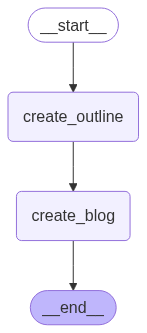

In [17]:
workflow

In [18]:
initial_state = {'title':  "create a blog post about LangGraph"}
final_state = workflow.invoke(initial_state)


In [19]:
final_state

{'title': 'create a blog post about LangGraph',
 'outline': 'Here\'s a comprehensive outline for a blog post titled "Unlocking Advanced LLM Agents: An Introduction to LangGraph."\n\n---\n\n## Blog Post Outline: Unlocking Advanced LLM Agents: An Introduction to LangGraph\n\n**Target Audience:** Developers, AI enthusiasts, data scientists familiar with LLMs and basic LangChain concepts, looking to build more complex, stateful AI applications.\n\n**Tone:** Informative, practical, slightly enthusiastic, encouraging.\n\n**Goal:** To introduce LangGraph, explain its core concepts, highlight its benefits over simpler chains, and inspire readers to start building more sophisticated LLM applications.\n\n---\n\n### I. Introduction (Approx. 150-200 words)\n\n*   **A. The LLM Revolution & Its Limits:**\n    *   Hook: LLMs are powerful, but simple "prompt-response" or linear "chains" often fall short for real-world applications.\n    *   Problem: Need for memory, iterative reasoning, decision-makin

In [20]:
final_state['content']

'Here\'s a blog post based on your comprehensive outline:\n\n---\n\n## Unlocking Advanced LLM Agents: An Introduction to LangGraph\n\nThe world of Large Language Models (LLMs) has exploded, transforming how we interact with technology. From generating creative content to summarizing complex documents, LLMs are incredibly powerful. Yet, for all their brilliance, simple "prompt-response" interactions or linear "chains" often fall short when building truly intelligent, real-world applications. We quickly hit limitations: how do we give an LLM memory across multiple turns? How can it iteratively refine its answers or make complex decisions? How do we enable it to self-correct when it makes a mistake?\n\nThis is where the need for more sophisticated orchestration comes in. Enter **LangGraph**, a revolutionary library designed to overcome these very challenges. Built on top of the popular LangChain framework, LangGraph provides the crucial missing piece for building stateful, multi-actor app